In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier


In [9]:
boston_data = pd.read_csv('BostonHousing.csv')
boston_data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [13]:
boston_data.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: xlabel='dis'>

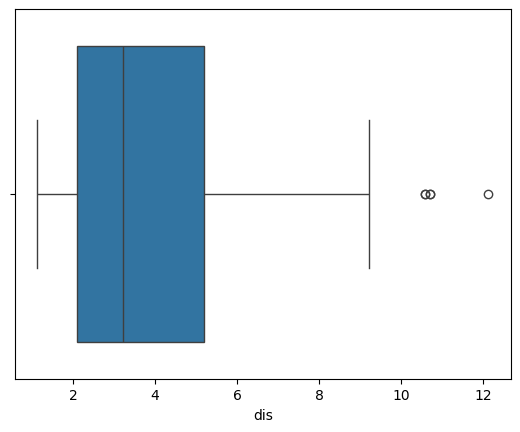

In [16]:
import seaborn as sns
sns.boxplot(x= boston_data['dis'])


In [19]:
Q1 = boston_data.quantile(0.25)
Q3 = boston_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#The IQR is used as a measure of statistical dispersion and is particularly useful for identifying outliers.


crim         3.595038
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.175000
rm           0.738000
age         49.050000
dis          3.088250
rad         20.000000
tax        387.000000
ptratio      2.800000
b           20.847500
lstat       10.005000
medv         7.975000
dtype: float64


In [22]:
boston_data.shape



(506, 14)

In [24]:
boston_df = boston_data.copy()

boston_df_out = boston_df[~((boston_df < (Q1 -1.5 *IQR))| (boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(268, 14)

In [25]:
data = boston_df_out.copy()


In [26]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [31]:
x = data.drop(['medv'], axis = 1 )
y = data['medv']

print(x.shape)
x.head()

(268, 13)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [32]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [33]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

print(x_train.shape)
print(x_test.shape)

(187, 13)
(81, 13)


In [37]:
#apply decision tree to get the correct classification by choosing the best attributes
from sklearn.tree import DecisionTreeRegressor
decision = DecisionTreeRegressor()

decision.fit(x_train, y_train)


DecisionTreeRegressor()

In [38]:
y_pred = decision.predict(x_test)
y_pred 

array([22.9, 18.5, 16.5, 16.6, 19. , 29.6, 18.4, 19.1, 18.3, 21.2, 24. ,
       24. , 22.9, 24.3, 16. , 19.5, 17.8, 17.8, 29.4, 19.5, 11.5, 21.2,
       11.9, 33.4, 23.9, 19.3, 18.9, 22.5, 24.7, 18.8, 19.3, 19.5, 17.4,
       18.7, 17.5, 11.5, 20.6, 20.7, 27.5, 29.6, 24.7, 18.4, 13.8, 23.8,
       22.6, 24.7, 17.5, 23.3, 16. , 24.4, 29.6, 18.4, 24.7, 16.1, 23.8,
       20.3, 24.4, 28.1, 18.5, 21.4, 13.8, 23.4, 24.7, 20.7, 24.7, 26.6,
       24.4, 16.6, 23.9, 17.1, 16.5, 15.2, 18.1, 21.8, 33.4, 20.4, 19.6,
       17.3, 26.6, 19.3, 16.5])

In [39]:
y_test 

52     25.0
230    24.3
147    14.6
24     15.6
86     22.5
       ... 
17     17.5
126    15.7
95     28.4
495    23.1
48     14.4
Name: medv, Length: 81, dtype: float64

In [40]:
mean_squared_error(y_pred, y_test)

np.float64(9.818888888888889)

In [41]:
#apply RandomForest 
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(1000)
rf_regressor.fit(x_train, y_train)


RandomForestRegressor(n_estimators=1000)

In [43]:
y_pred_rf = rf_regressor.predict(x_test)


In [44]:
mean_squared_error(y_pred_rf, y_test)

np.float64(5.40375577888885)

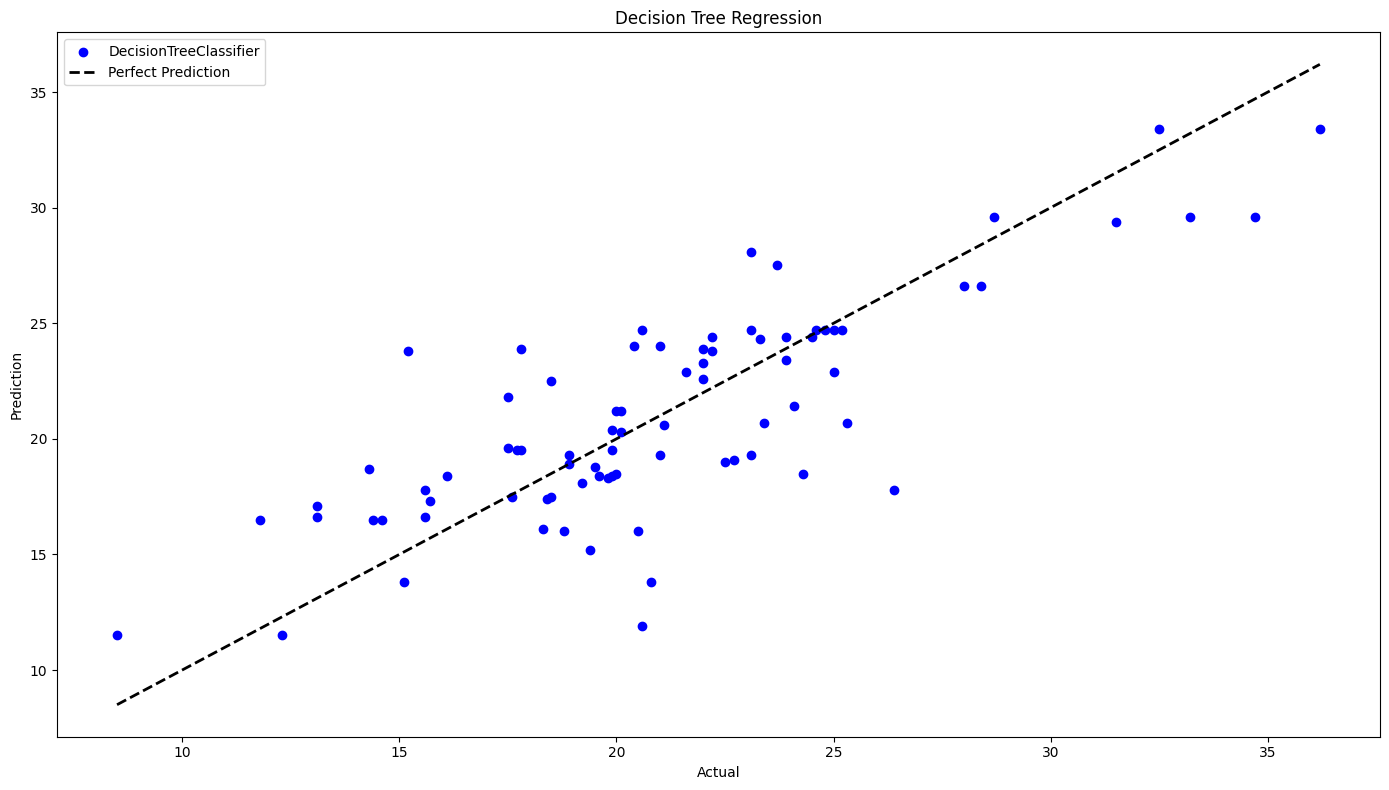

In [46]:
plt.figure(figsize= (14,8))


plt.scatter(y_test, y_pred, color = 'blue', label = 'DecisionTreeClassifier')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw =2, label = 'Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Decision Tree Regression')
plt.legend()


plt.tight_layout()
plt.show()

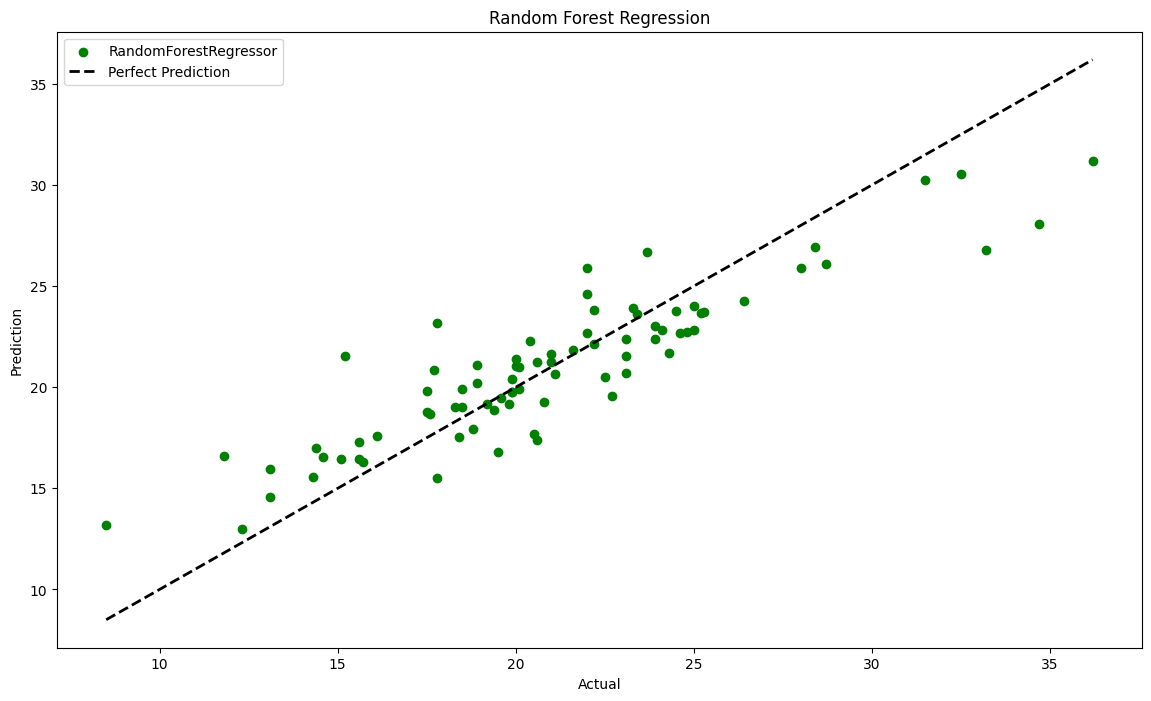

In [47]:
plt.figure(figsize= (14,8))

plt.scatter(y_test, y_pred_rf, color = 'green', label = 'RandomForestRegressor' )
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k--', lw = 2 , label = 'Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score


mae_tree = mean_absolute_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

mse_tree = mean_squared_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred_rf)

rmse_tree = mse_tree ** 0.5
rmse_rf = mse_rf ** 0.5

r2_tree = r2_score(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"mean_absolute_error (Decision Tree): {mae_tree}")
print(f"mean_absolute_error ( Random Forest): {mae_rf}")

print("------       ------")


print(f"mean_squared_error (Decision Tree): {mse_tree}")
print(f"mean_squared_error ( Random Forest): {mse_rf}")

print("------       ------")

print(f"Root_mean_squared_error (Decision Tree): {rmse_tree}")
print(f"Root_mean_squared_error ( Random Forest): {rmse_rf}")

print("------       ------")

print(f"R-squared_error (Decision Tree): {r2_tree}")
print(f"R-squared_error ( Random Forest): {r2_rf}")

print("------       ------")






mean_absolute_error (Decision Tree): 2.4135802469135803
mean_absolute_error ( Random Forest): 1.7949716049382625
------       ------
mean_squared_error (Decision Tree): 9.818888888888889
mean_squared_error ( Random Forest): 5.40375577888885
------       ------
Root_mean_squared_error (Decision Tree): 3.1335106332816056
Root_mean_squared_error ( Random Forest): 2.3245979822087195
------       ------
R-squared_error (Decision Tree): 0.6152836039732337
R-squared_error ( Random Forest): 0.7882740632073513
------       ------


In [ ]:
''' Random Forest model shows lower MAE, MSE, RMSE as compare to the Decision tree
    Also the R_squared value is higher than the decision tree regressor 
    Thus we conclude that the random forest regression out-performs the Decision tree 
    NOTE: It's a good example of which says that Random forest is an ensemble method, 
    generally outperform single Decision tree by reducing overfitting and capturing 
    more complex patterns in the data. 
    '''